In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
df= pd.read_csv("calories_consumed.csv") 
df


,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [5]:
df.rename(columns = {'Weight gained (grams)':'w'}, inplace = True)
df.rename(columns = {'Calories Consumed':'c'}, inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   w       14 non-null     int64
 1   c       14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [6]:
plt.bar(hight = df['w'], x = np.arange(1,14,1))

TypeError: bar() missing 1 required positional argument: 'height'

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <BarContainer object of 10 artists>)

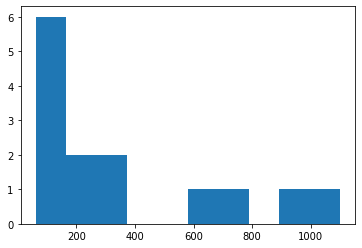

In [7]:
plt.hist(df.w)

In [8]:
df['w'].skew()

1.2557366483972048

In [9]:
df['w'].kurt()

0.4312724433726336

{'whiskers': [<matplotlib.lines.Line2D at 0x233a3ad4370>,
 'caps': [<matplotlib.lines.Line2D at 0x233a3ad49d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x233a3ad40a0>],
 'medians': [<matplotlib.lines.Line2D at 0x233a3ad4eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x233a3ae31c0>],
 'means': []}

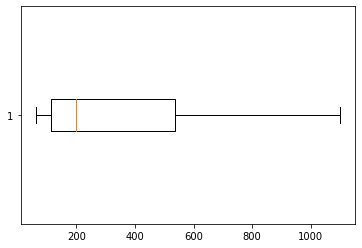

In [10]:
plt.boxplot(df.w, vert = False)

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <BarContainer object of 10 artists>)

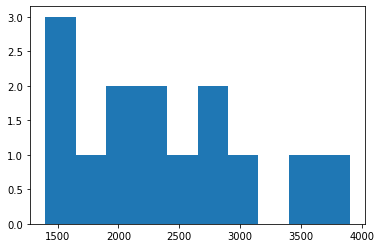

In [11]:
plt.hist(df.c)

In [12]:
df['c'].kurt()

-0.29048129735135975

In [13]:
df['c'].skew()

0.6549299573588712

{'whiskers': [<matplotlib.lines.Line2D at 0x233a3bb6310>,
 'caps': [<matplotlib.lines.Line2D at 0x233a3bb68b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x233a3bb6040>],
 'medians': [<matplotlib.lines.Line2D at 0x233a3bb6e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x233a3bc6160>],
 'means': []}

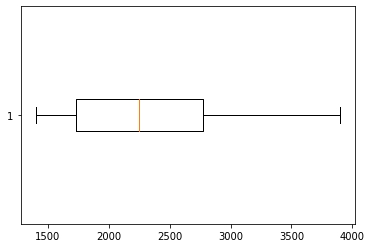

In [14]:
plt.boxplot(df.c,vert=False)

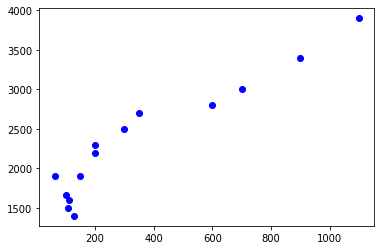

In [15]:
plt.scatter(x = df['w'], y = df['c'], color = 'blue') 

In [16]:
np.corrcoef(df['c'], df['w'])

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [17]:
cov_output = np.cov(df.c, df.w)[0, 1]
cov_output

237669.4505494506

In [18]:
model = smf.ols('w~c', data = df).fit()
model.summary()

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.86e-07
Time:                        14:43:06   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
c              0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
pred1 = model.predict(df['c'])

In [20]:
df['w_pred'] = pred1

In [21]:
df.head()

,w,c,w_pred
0,108,1500,4.482599
1,200,2300,340.607908
2,900,3400,802.780209
3,200,2200,298.592245
4,300,2500,424.639236


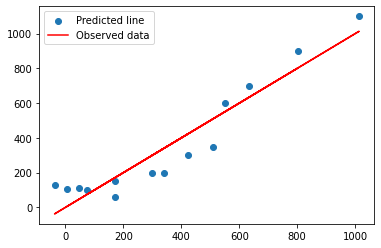

In [22]:
plt.scatter(df.w_pred, df.w)
plt.plot(df.w_pred, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [23]:
res1 = df.w_pred - df.w
res_sqr1 = res1 * res1 
mse1 = np.mean(res_sqr1) 
rmse1 = np.sqrt(mse1) 
rmse1

103.30250194726935

In [24]:
100-rmse1

-3.3025019472693486

In [25]:
model2 = smf.ols('w ~ np.log(c)', data = df).fit()
model2.summary()
pred2 = model2.predict(pd.DataFrame(df['c']))

res2 = df.w - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


141.0053816942511

In [29]:
model3 = smf.ols('np.log(w) ~ c', data = df).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(df['c']))
pred3_at = np.exp(pred3)
pred3_at


res3 = df.w - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


118.04515720118044

In [30]:
model4 = smf.ols('np.log(w) ~ c + I(c*c)', data = df).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)
pred4_at

# Error calculation
res4 = df.w - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


117.4145001310951

In [31]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,103.302502
1,Log model,141.005382
2,Exp model,118.045157
3,Poly model,117.414500


In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

train.shape,test.shape

((11, 3), (3, 3))

In [33]:
finalmodel = smf.ols('w~c', data = train).fit()
finalmodel.summary()

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      w   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 18 May 2022   Prob (F-statistic):           3.02e-06
Time:                        14:50:47   Log-Likelihood:                -65.665
No. Observations:                  11   AIC:                             135.3
Df Residuals:                       9   BIC:                             136.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -657.5112    110.180     -5.968      0.000    -906.757    -408.266
c              0.4346      0.043     10.206      0.000       0.338       0.531
==============================================================================
Omnibus:                        2.245   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                1.478
Skew:                          -0.719   Prob(JB):                        0.478
Kurtosis:                       1.924   Cond. No.                     9.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
test_pred = finalmodel.predict(test)
pred_test_AT = np.exp(test_pred)
pred_test_AT

3    4.487084e+129
6     4.657680e-22
7     1.079049e+73
dtype: float64

In [36]:
test_res = test.w - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

2.5906190496014e+129

In [37]:
test_acc=100-test_rmse
print(test_acc)

-2.5906190496014e+129


In [39]:
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT


train_res = train.w - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [40]:
train_acc=100-32.34600214683498
print(train_acc)

67.65399785316502


In [41]:
print(test_acc)

-2.5906190496014e+129
